#Install Dependencies

In [42]:
# For data manipulation and loading
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For machine learning models, preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# For saving and loading models
import joblib


#Load Dataset

In [43]:
import pandas as pd

df = pd.read_csv('/content/all_seasons.csv')

In [44]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


#Visualization

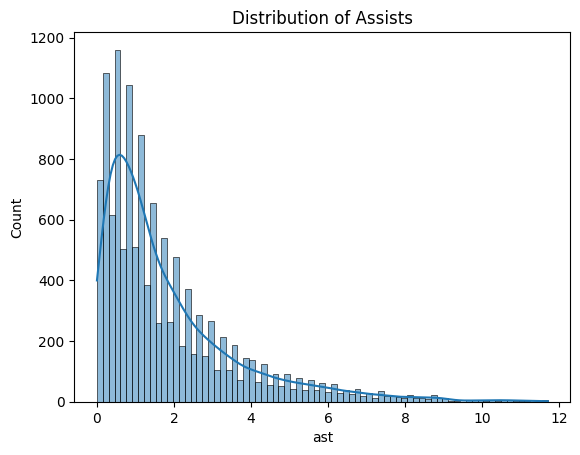

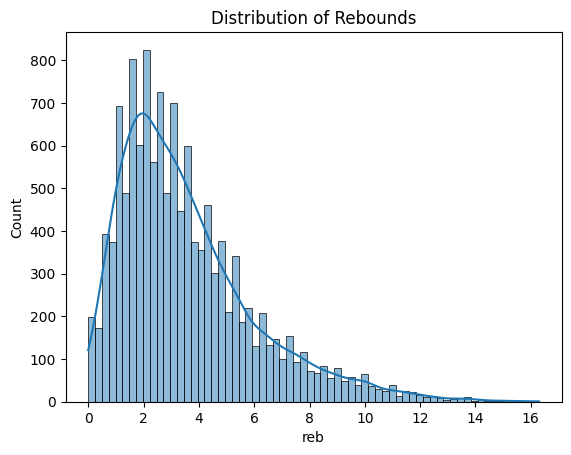

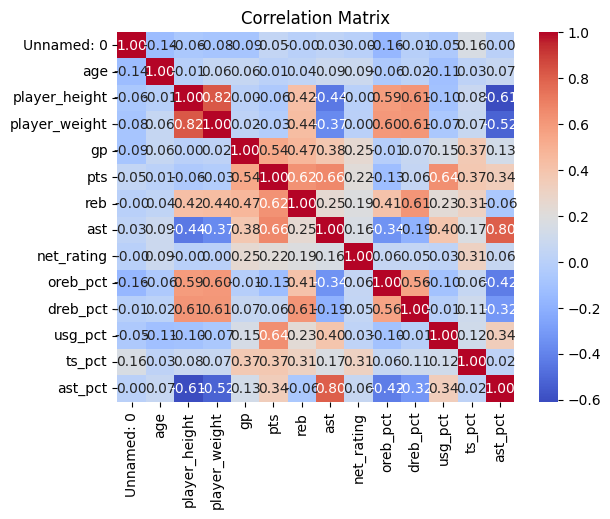

In [57]:
# Load dataset
df = pd.read_csv('/content/all_seasons.csv')

# Display first few rows
df.head()

# Plot distribution of Assists
sns.histplot(df['ast'], kde=True)
plt.title('Distribution of Assists')
plt.show()

# Plot distribution of Rebounds
sns.histplot(df['reb'], kde=True)
plt.title('Distribution of Rebounds')
plt.show()

# Calculate correlation matrix, including only numerical features
corr = df.select_dtypes(include=np.number).corr()

# Heatmap to show correlation between features
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#Feature Engineering

In [58]:
# Assuming 'pts' is the actual column name for points in your dataset
df['points_rolling_avg_5'] = df['pts'].rolling(window=5).mean()

# Display the updated dataset with new feature
df.head()

# Standardize relevant features
scaler = StandardScaler()
df[['pts', 'ast', 'reb']] = scaler.fit_transform(df[['pts', 'ast', 'reb']])

# Check the changes
df.head()

# Filter correlations greater than 0.8 (excluding the diagonal)
correlated_features = corr[corr > 0.8]
print(correlated_features)


               Unnamed: 0  age  player_height  player_weight   gp  pts  reb  \
Unnamed: 0            1.0  NaN            NaN            NaN  NaN  NaN  NaN   
age                   NaN  1.0            NaN            NaN  NaN  NaN  NaN   
player_height         NaN  NaN       1.000000       0.822141  NaN  NaN  NaN   
player_weight         NaN  NaN       0.822141       1.000000  NaN  NaN  NaN   
gp                    NaN  NaN            NaN            NaN  1.0  NaN  NaN   
pts                   NaN  NaN            NaN            NaN  NaN  1.0  NaN   
reb                   NaN  NaN            NaN            NaN  NaN  NaN  1.0   
ast                   NaN  NaN            NaN            NaN  NaN  NaN  NaN   
net_rating            NaN  NaN            NaN            NaN  NaN  NaN  NaN   
oreb_pct              NaN  NaN            NaN            NaN  NaN  NaN  NaN   
dreb_pct              NaN  NaN            NaN            NaN  NaN  NaN  NaN   
usg_pct               NaN  NaN            NaN       

#Model Training and Evaluation

In [59]:
# Features and target variable
X = df.select_dtypes(include=np.number).drop(columns=['pts'])  # Select only numerical features and drop target
y = df['pts']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(f'Linear Regression R-squared: {r2_score(y_test, y_pred)}')
print(f'Linear Regression MAE: {mean_absolute_error(y_test, y_pred)}')

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print(f'Ridge Regression R-squared: {r2_score(y_test, y_pred_ridge)}')
print(f'Ridge Regression MAE: {mean_absolute_error(y_test, y_pred_ridge)}')

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances
feature_importance = rf_model.feature_importances_

# Display feature importance
for feature, importance in zip(X.columns, feature_importance):
    print(f'{feature}: {importance}')


Linear Regression R-squared: 0.8932621952595525
Linear Regression MAE: 0.22668291280962374
Ridge Regression R-squared: 0.8916307708406408
Ridge Regression MAE: 0.22855106373862313
Unnamed: 0: 0.003601013042489861
age: 0.0023554912577989314
player_height: 0.0014755519529512497
player_weight: 0.0026051366587357297
gp: 0.015304604486692115
reb: 0.16826450981054336
ast: 0.38140323723718594
net_rating: 0.0028863738634678964
oreb_pct: 0.008024511140168973
dreb_pct: 0.018425366589414183
usg_pct: 0.3395570643881914
ts_pct: 0.03809482585378648
ast_pct: 0.014167497406934829
points_rolling_avg_5: 0.003834816311639098


#Hyperparameter Tuning

In [60]:
# Set up hyperparameter grid for Ridge Regression
param_grid = {'alpha': [0.1, 1.0, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best CV score: {grid_search.best_score_}')

# Get the best Ridge model after tuning
best_ridge_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best_ridge = best_ridge_model.predict(X_test)
print(f'Tuned Ridge Regression R-squared: {r2_score(y_test, y_pred_best_ridge)}')
print(f'Tuned Ridge Regression MAE: {mean_absolute_error(y_test, y_pred_best_ridge)}')

# Save the tuned model
joblib.dump(best_ridge_model, 'best_ridge_model.pkl')


Best hyperparameters: {'alpha': 0.1}
Best CV score: -0.23339066618759158
Tuned Ridge Regression R-squared: 0.8931182301451515
Tuned Ridge Regression MAE: 0.22685198673243165


['best_ridge_model.pkl']

#Model Saving and Loading

In [61]:
# Save the Ridge Regression model if it performed better
joblib.dump(ridge_model, 'ridge_model.pkl')
print("Ridge Regression model saved!")

# Load the saved model
loaded_model = joblib.load('ridge_model.pkl')

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
print(f'Loaded Ridge Regression R-squared: {r2_score(y_test, y_pred_loaded)}')
print(f'Loaded Ridge Regression MAE: {mean_absolute_error(y_test, y_pred_loaded)}')


Ridge Regression model saved!
Loaded Ridge Regression R-squared: 0.8916307708406408
Loaded Ridge Regression MAE: 0.22855106373862313
